# 1. Setup And Load Data 
##### 1.1 Install Dependencies & Import 

In [209]:
# I installed the packages below through the terminal
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib 

import tensorflow as tf
import os

In [210]:
# Avoid Out Of Memory errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

##### 1.2 Load Data

In [211]:
import cv2 # opencv
import imghdr # check file extentions for certain images

In [212]:
image_extns = ['jpeg', 'jpg', 'png']
data_dir = 'data'

In [213]:
#img=cv2.imread(os.path.join('data', 'available', 'Screenshot 2023-03-17 153704.png'))
#img.shape
#plt.imshow(img)

In [214]:
# Check every image within the main 'Data' folder for incorrect
# file extention types
for folder in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, folder)):
        image_path = os.path.join(data_dir, folder, image)
        try:
            #img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extns:
                print('Image does not have valid extention', format(image_path))
                os.remove(image_path)
        except:
                print('Could not read image', format(image_path))

In [215]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [216]:
import numpy as np 
from matplotlib import pyplot as plt

In [217]:
# Builds image data set (this is the data pipeline)
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 435 files belonging to 2 classes.


In [218]:
# Data set is not preloaded into memory already (it is a 
# only a generator), so we have to convert data set into
# numpy iterator to access data 
data_iterator = data.as_numpy_iterator()

In [219]:
# Get batch of data
batch = data_iterator.next()

In [220]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [221]:
batch[1].shape

(32,)

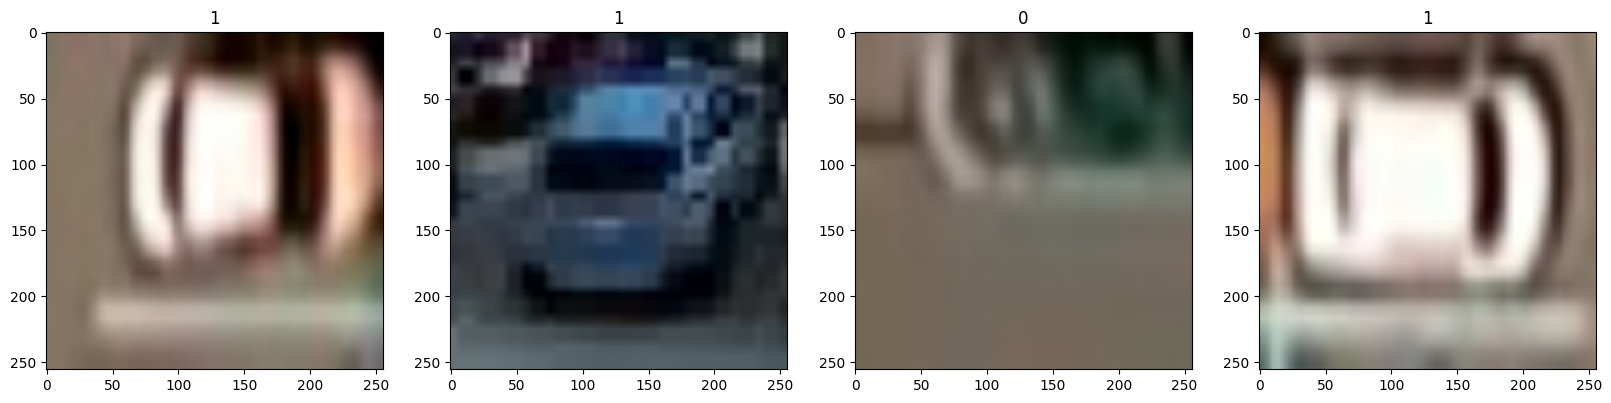

In [222]:
# Check what each flag is
# folder 0 = available
# folder 1 = unavailable
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data
##### 2.1 Scale Data

In [223]:
scaledData = data.map(lambda x,y: (x/255, y))

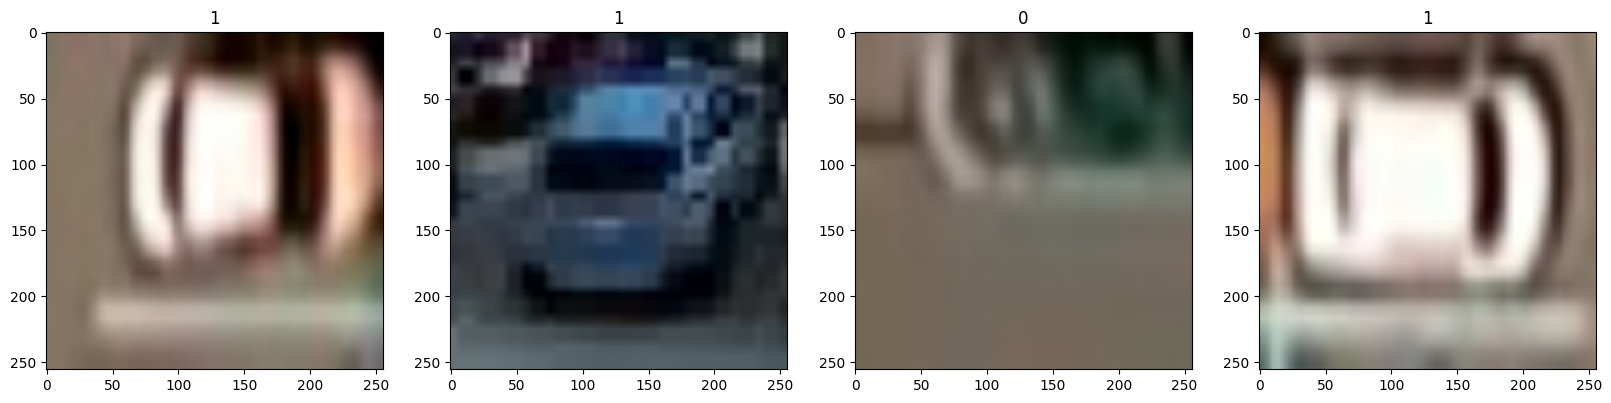

In [224]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

##### 2.2 Categorize Data 
###### into training and testing partition 

In [225]:
len(scaledData) #14 batches


14

In [226]:
# training data: what is used to train deep learning model
# validation data: used to evaluate model while training (fine tuning)
# test data: used post training to evaluate training
train_size = int(len(scaledData)*.7)
val_size = int(len(scaledData)*.2)+1
test_size = int(len(scaledData)*.1)+1

In [227]:
# take: defines how much data to use for partition 
train = scaledData.take(train_size)
validate = scaledData.skip(train_size).take(val_size)
test = scaledData.skip(train_size + val_size).take(test_size)

# 3. Deep Model
##### 3.1 Build Deep Learning Model 

In [228]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [229]:
# Establishing Sequential Class
model = Sequential()

In [230]:
# Adding convolutional layer and Mask Pool Layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [231]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [232]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

##### 3.2 Train

In [233]:
logdir = 'logs'

In [234]:
# Logs how the model performs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [235]:
# .fit takes in training data
history = model.fit(train, epochs=20, validation_data=validate, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 5s 442ms/step - loss: 0.6654 - accuracy: 0.7222 - val_loss: 0.4906 - val_accuracy: 0.7396
Epoch 2/20
9/9 [==============================] - 4s 410ms/step - loss: 0.3960 - accuracy: 0.7188 - val_loss: 0.3049 - val_accuracy: 0.9583
Epoch 3/20
9/9 [==============================] - 4s 419ms/step - loss: 0.2713 - accuracy: 0.9444 - val_loss: 0.1843 - val_accuracy: 0.9375
Epoch 4/20
9/9 [==============================] - 4s 444ms/step - loss: 0.2213 - accuracy: 0.9514 - val_loss: 0.2298 - val_accuracy: 0.9688
Epoch 5/20
9/9 [==============================] - 4s 433ms/step - loss: 0.1901 - accuracy: 0.9583 - val_loss: 0.1891 - val_accuracy: 0.9688
Epoch 6/20
9/9 [==============================] - 4s 480ms/step - loss: 0.1770 - accuracy: 0.9688 - val_loss: 0.1986 - val_accuracy: 0.9375
Epoch 7/20
9/9 [==============================] - 5s 511ms/step - loss: 0.1177 - accuracy: 0.9722 - val_loss: 0.1462 - val_accuracy: 0.9688
Epoch 8/20
9/9 [====

In [237]:
history.history

{'loss': [0.665416955947876,
  0.3959704339504242,
  0.2712699770927429,
  0.2213020771741867,
  0.1900574117898941,
  0.17696616053581238,
  0.11771343648433685,
  0.11367559432983398,
  0.0729353278875351,
  0.08706144243478775,
  0.07834170013666153,
  0.04916798695921898,
  0.04467938467860222,
  0.04704739898443222,
  0.026474857702851295,
  0.03932590037584305,
  0.027791827917099,
  0.03836563974618912,
  0.04044056311249733,
  0.03056676872074604],
 'accuracy': [0.7222222089767456,
  0.71875,
  0.9444444179534912,
  0.9513888955116272,
  0.9583333134651184,
  0.96875,
  0.9722222089767456,
  0.9618055820465088,
  0.9861111044883728,
  0.9756944179534912,
  0.9791666865348816,
  0.9861111044883728,
  0.9861111044883728,
  0.9895833134651184,
  0.9930555820465088,
  0.9930555820465088,
  0.9930555820465088,
  0.9895833134651184,
  0.9930555820465088,
  0.9930555820465088],
 'val_loss': [0.49060821533203125,
  0.30488619208335876,
  0.18425023555755615,
  0.22980184853076935,
  0.

##### 3.3 Plot Data

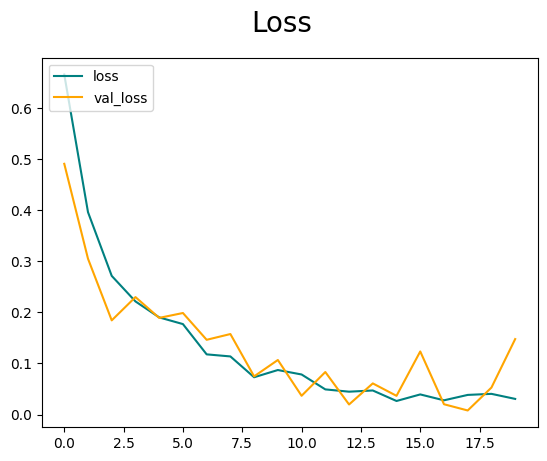

In [238]:
# show loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

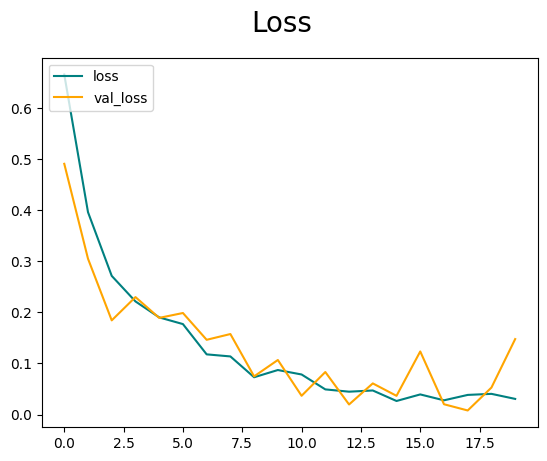

In [239]:
# show accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# 4. Evaluate Performance
##### 4.1